# JupyterWorkflow


## From exploratory analysis to reproducible science

Mehmetcan Budak

In [1]:
URL = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

In [2]:
from urllib.request import urlretrieve
urlretrieve(URL, "Freemont.csv")

('Freemont.csv', <http.client.HTTPMessage at 0x103ae8be0>)

In [3]:
!head Freemont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [4]:
import pandas as pd
data = pd.read_csv("Freemont.csv")
data.head()

,Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
0,10/03/2012 12:00:00 AM,4.0,9.0
1,10/03/2012 01:00:00 AM,4.0,6.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,2.0,3.0
4,10/03/2012 04:00:00 AM,6.0,1.0


In [5]:
data = pd.read_csv("Freemont.csv", index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


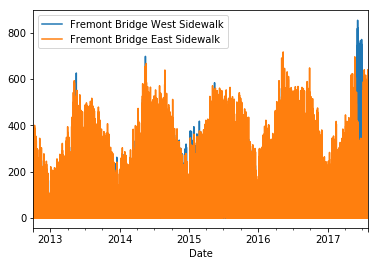

In [6]:
%matplotlib inline
data.index = pd.to_datetime(data.index)
data.plot()

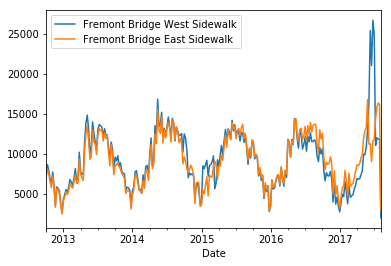

In [7]:
data.resample('W').sum().plot()

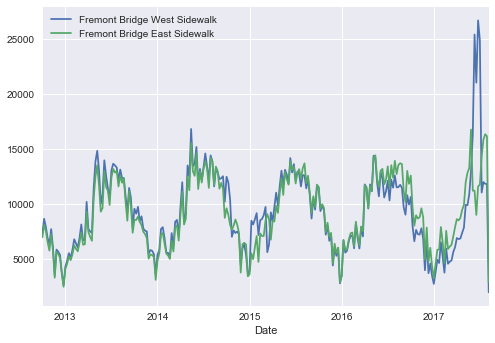

In [8]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
data.resample("W").sum().plot()

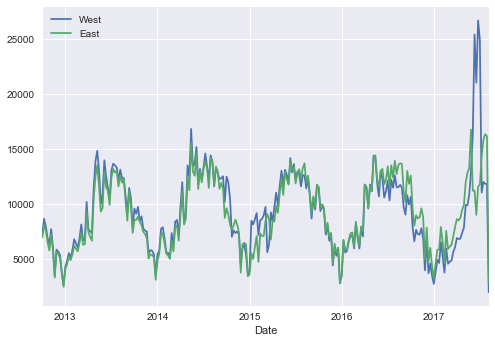

In [9]:
data.columns = ["West", "East"]
data.resample("W").sum().plot()

Look for Annual Trend; growth-decline over ridership

Let's try a rolling window. Over 365 days rolling sum

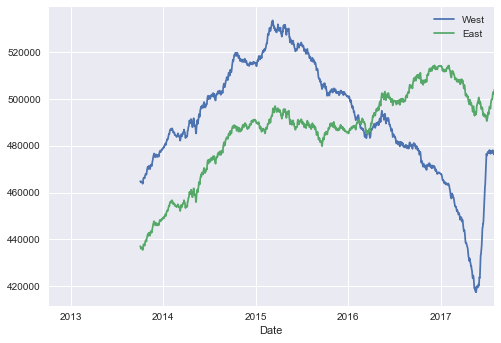

In [10]:
data.resample("D").sum().rolling(365).sum().plot()

They don't go all the way to zero so let's set the y lenght to zero to none. current maxima.

(0, 539148.30000000005)

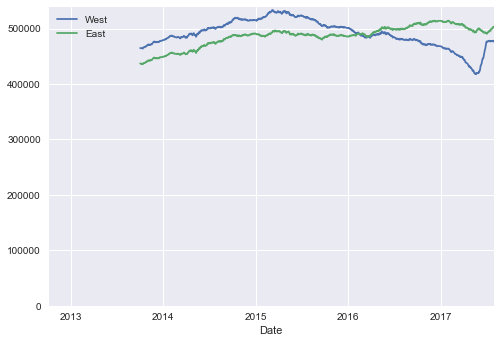

In [11]:
ax = data.resample("D").sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

There seems to be a offset between the left and right sidewalk. Let's plot them. See their trends.

(0, 1059460.05)

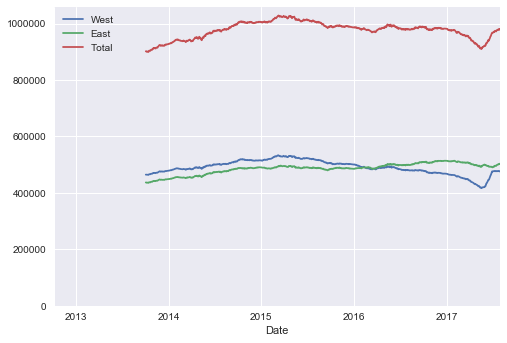

In [12]:
data["Total"] = data["West"] + data["East"]

ax = data.resample("D").sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

Somehow the east and west side trends are reversed so the total bike rides across the bridge hover around 1 million and pretty accurent over the last couple of years +- couple percent.

Let's group by time of day and let's take it's mean and plot it.

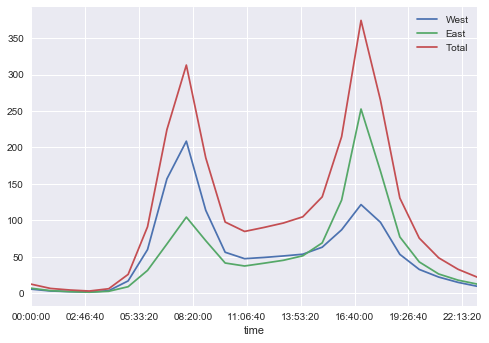

In [13]:
data.groupby(data.index.time).mean().plot()

Let's see the whole data set in this way not just this average. We will do a pivot table.

In [14]:
pivoted = data.pivot_table("Total", index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]


,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


We now have a 2d data set. Each column is a day and each row is an hour during that day.
Let's take legend off and plot it.

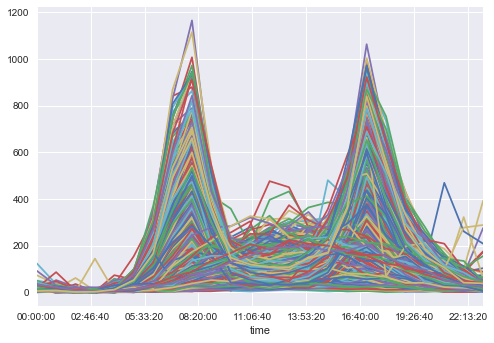

In [15]:
pivoted.plot(legend=False)

Let's reduce transparency to see better.

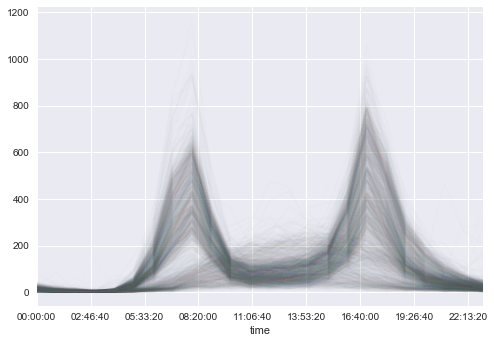

In [16]:
pivoted.plot(legend=False,alpha=0.01)

Let's do a quick, "Restart & Run All" to check if the analysis is reproduced to same way we did.

Let's upload this to GitHub.
Let's create a new repository, initialize it with a readme, add a python .gitignore and add MIT license. Create the repository.

Get the https key from the repository.

Open the terminal to the same directory as we are writing this in.

git clone {whatever-the-copied-thing-is}

cd JupyterWorkflow to see that readme and license are there.

mv JupyterWorkflow.ipynb JupyterWorkflow

cd JupyterWorkflow

git status to see that the newly copied document isn't updated with

git add JupyterNotebook.ipynbb

git commit - m "Add initial analysis notebook

###This is the comment

git push origin master

#put your password

git status



the notebook should be on github now.
